In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/assignment2

/content/drive/MyDrive/assignment2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import cf_matrix

plt.style.use('fivethirtyeight')
import nltk
from nltk.stem import WordNetLemmatizer

from utils import stopwords

warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
labels = ["True Neg(FCF)", "False Pos(FCM)", "False Neg(MCF)", "True Pos(MCF)"]
categories = ["Female", "Male"]
df = pd.read_csv("file3.csv")
# df.pop('space')
# df = df[df['gen'] != 'I']
for gen in df['gen']:

    if gen == 'M':

        df['gen'].replace({'M': '1'}, inplace=True)

    elif gen == 'F':

        df['gen'].replace({'F': '0'}, inplace=True)




In [5]:
from tokenizer import WordTokenizer

df['headline'] = [WordTokenizer(sentence, keep_punctuations=False, keep_stopwords=True) for sentence in df['headline']]
sentence_new = []
for each_row in df['headline']:
    sentence_new.append([i for i in each_row if not i.isalnum()])

sentence_new_alpha = []
stop_words = set(stopwords.prose_stopwords)
stop_words = stop_words.union(set(stopwords.poetry_stopwords))
for each_row in sentence_new:
    sentence_new_alpha.append([i for i in each_row if i not in stop_words])

df['headlines_Cleaned'] = sentence_new_alpha

df['headlines_Cleaned'] = [" ".join(desc) for desc in df['headlines_Cleaned'].values]


In [6]:
def pre_demo(hline):
  tokens = WordTokenizer(hline, keep_punctuations=False)
  print(tokens)
  hline_new = []
  hline_new.append([i for i in tokens if not i.isalnum()])
  print(hline_new)
  stop_words = set(stopwords.prose_stopwords)
  stop_words = stop_words.union(set(stopwords.poetry_stopwords))
  hline_new_alpha = []
  hline_new_alpha.append([i for i in hline_new[0] if i not in stop_words])
  print(hline_new_alpha[0])
  hline_final = " ".join(hline_new_alpha[0])
  print(hline_final)

  



pre_demo("પત્ની દીપિકા પણ નથી જાણતી રણવીર સિંઘનું એક ખાસ રહસ્ય?")

['પત્ની', 'દીપિકા', 'પણ', 'નથી', 'જાણતી', 'રણવીર', 'સિંઘનું', 'એક', 'ખાસ', 'રહસ્ય']
[['પત્ની', 'દીપિકા', 'નથી', 'જાણતી', 'રણવીર', 'સિંઘનું', 'ખાસ', 'રહસ્ય']]
['પત્ની', 'દીપિકા', 'નથી', 'જાણતી', 'રણવીર', 'સિંઘનું', 'ખાસ', 'રહસ્ય']
પત્ની દીપિકા નથી જાણતી રણવીર સિંઘનું ખાસ રહસ્ય


Accuracy: 45.00%


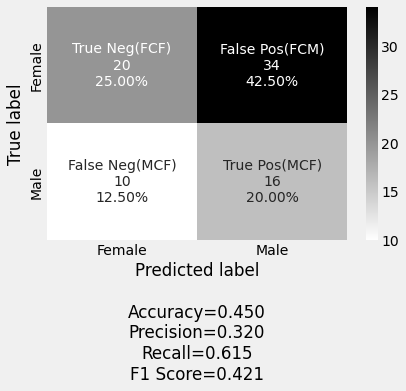

In [7]:
cv = CountVectorizer(max_features=10000)
x = cv.fit_transform(df['headlines_Cleaned']).toarray()
X = pd.DataFrame(x)
x = np.array(X)
y = np.array(df['gen'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
gnbmodel = GaussianNB()
gnbmodel.fit(X_train, y_train)
y_pred = gnbmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
NB_CF = confusion_matrix(y_test, y_pred)
cf_matrix.make_confusion_matrix(NB_CF, group_names=labels, categories=categories, cmap="binary")
plot_x = ["Naive Bayes"]
plot_y = [accuracy * 100]


Accuracy: 63.75% 


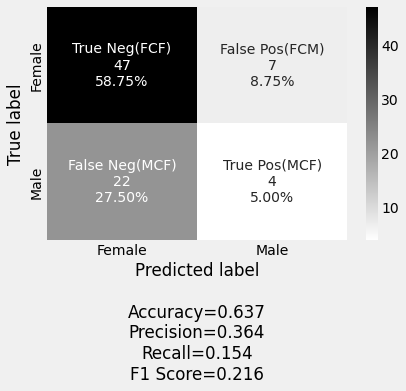

In [8]:
lgbmodel = LGBMClassifier(max_depth=3)
lgbmodel.fit(X_train, y_train)
y_pred1 = lgbmodel.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%% " % (accuracy1 * 100.0))
LGBM_CF=confusion_matrix(y_test, y_pred1)
cf_matrix.make_confusion_matrix(LGBM_CF, group_names=labels, categories=categories, cmap="binary")
plot_x += ["Lightgbm"]
plot_y += [accuracy1 * 100]

Accuracy: 67.50% 


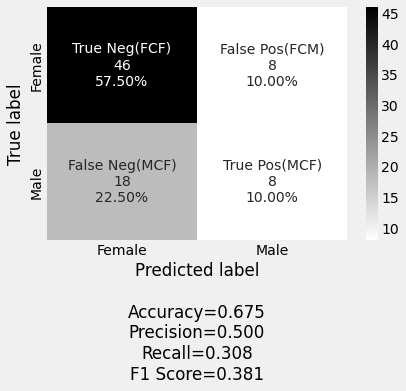

In [9]:
xgbmodel = XGBClassifier(max_depth=5, min_child_weight=1)
y_train = y_train.astype(np.int)
y_test = y_test.astype(np.int)
xgbmodel.fit(X_train, y_train)
y_pred2 = xgbmodel.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%% " % (accuracy2 * 100.0))
XGB_CF=confusion_matrix(y_test, y_pred2)
cf_matrix.make_confusion_matrix(XGB_CF, group_names=labels, categories=categories, cmap="binary")
plot_x += ["XGBoost"]
plot_y += [accuracy2 * 100]

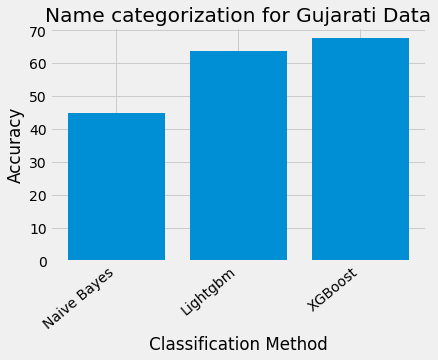

In [10]:
ax= plt.subplot()
plt.bar(plot_x, plot_y)
plt.setp(ax.get_xticklabels(), rotation=40, ha='right')
plt.xlabel("Classification Method")
plt.ylabel("Accuracy")
plt.title("Name categorization for Gujarati Data")
plt.show()

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[[53  1]
 [25  1]] : is the confusion matrix
Accuracy: 67.50% 


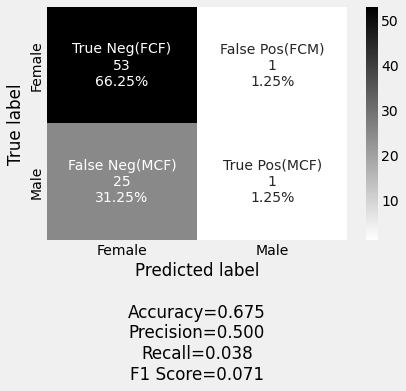

In [11]:
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnbmodel, param_grid=param_grid_nb, verbose=1, cv=3, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
y_pred_hyper = nbModel_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_hyper), ": is the confusion matrix")
accuracy_gnb_hyper = accuracy_score(y_test, y_pred_hyper)
print("Accuracy: %.2f%% " % (accuracy_gnb_hyper * 100.0))
HP_NB_CF = confusion_matrix(y_test, y_pred_hyper)
cf_matrix.make_confusion_matrix(HP_NB_CF, group_names=labels, categories=categories, cmap="binary")
plot_x += ["Hyper Parameters GNB"]
plot_y += [accuracy_gnb_hyper * 100]